In [700]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [701]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [702]:
order_ql = pd.read_csv("Orders_Quality_without_Outliers_C.csv")
orderlines_ql = pd.read_csv("Orderlines_Quality_without_Outliers_C.csv")
products_ql = pd.read_csv("Products_Quality_C.csv")

brands_cl = pd.read_csv("brands.csv")
product_category = pd.read_csv("products_completed_category.csv")

In [703]:
orderlines_ql["date"] = pd.to_datetime(orderlines_ql["date"])
order_ql["created_date"] = pd.to_datetime(order_ql["created_date"])

## Categorys

In [704]:
products_ql["type"]

0           8696
1       13855401
2           1387
3           1230
4           1364
          ...   
5931    13835403
5932    13835403
5933    13835403
5934    13835403
5935    13835403
Name: type, Length: 5936, dtype: object

In [705]:
n = 60
print(f"With the {n} largest types, we account for {((products_ql.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (products_ql.shape[0]) * 100).round(2)}% of all products.")

With the 60 largest types, we account for 92.28% of all products.


In [706]:
needed_categorys = product_category[["sku","category"]]

In [707]:
products_ql = products_ql.merge(needed_categorys, on="sku", how="inner")

## Answer Questions

1. What is the time period that the dataset covers?
2. What is the overall revenue for that time?
3. Are there seasonal patterns in the evolution of sales?
4. What are the most sold products?
5. What are the products that generate the most revenue?
6. A critical question is whether revenue grows whenever discounts increase.

1.

In [708]:
order_ql.groupby([order_ql["created_date"].dt.year, order_ql["created_date"].dt.month_name()]).count()

order_id  created_date  total_paid  state  \
created_date created_date                                              
2017         April             1578          1578        1578   1578   
             August            2302          2302        2302   2302   
             December          5394          5394        5394   5394   
             February          2243          2243        2243   2243   
             January           5008          5008        5008   5008   
             July              3313          3313        3313   3313   
             June              1523          1523        1523   1523   
             March              198           198         198    198   
             May               1832          1832        1832   1832   
             November          7025          7025        7025   7025   
             October           3066          3066        3066   3066   
             September         2130          2130        2130   2130   
2018         February          3232          3232        3232   3232   
             January           5116          5116        5116   5116   
             March             1490          1490        1490   1490   

                           unit_price_total  difference  
created_date created_date                                
2017         April                     1578        1578  
             August                    2302        2302  
             December                  5394        5394  
             February                  2243        2243  
             January                   5008        5008  
             July                      3313        3313  
             June                      1523        1523  
             March                      198         198  
             May                       1832        1832  
             November                  7025        7025  
             October                   3066        3066  
             September                 2130        2130  
2018         February                  3232        3232  
             January                   5116        5116  
             March                     1490        1490

In [709]:
# It covers 15 months

2.

In [710]:
order_ql["total_paid"].sum()

np.float64(15367897.219999999)

In [711]:
order_ql.groupby([order_ql["created_date"].dt.year, order_ql["created_date"].dt.month_name()])["total_paid"].sum()

created_date  created_date
2017          April           420423.29
              August          710623.12
              December       1857794.76
              February        616186.70
              January        1158598.78
              July           1010642.49
              June            622050.18
              March           114619.30
              May             596631.17
              November       2900997.82
              October        1066769.02
              September       847594.82
2018          February       1041550.04
              January        1932149.25
              March           471266.48
Name: total_paid, dtype: float64

In [712]:
# 15_367_897.22 Euro have been gained as revenue in these 15 months

3.

In [713]:
# Sales automatically increase once we get arount to do the holidays but discounts on those days specifically increases the sales

4.

In [714]:
orderlines_ql = orderlines_ql.merge(needed_categorys, on="sku", how="inner")

In [715]:
orderlines_ql.groupby("sku")["sku"].count().sort_values()

sku
ZAG0042        1
KIN0125        1
AKI0016-A      1
PAC1255        1
PAC1226        1
            ... 
SAM0074      317
APP0927      381
APP0698      487
APP1922      523
APP1190      926
Name: sku, Length: 5936, dtype: int64

In [716]:
products_ql.loc[products_ql["sku"].isin(("APP1190", "APP1922", "APP0698", "APP0927", "SAM0074"))]

,sku,name,desc,price,in_stock,type,unit_price,category
333,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,14.99,Connectors
622,SAM0074,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1,12215397,189.00,Storage
717,APP0927,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,23.99,I/O Device
1317,APP1190,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231,70.00,AppleCare
3038,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384,179.00,I/O Device


In [717]:
# The most often sold Products are apple products

In [718]:
orderlines_ql.groupby("category")[["sku"]].count().sort_values(by=("sku"), ascending=False)

,sku
category,
Storage,14711
Protective Cover,9525
I/O Device,8326
Others,6023
Adapter,3509
Connectors,3454
PCs,3326
Smartphones,2749
Battery,1911


In [719]:
# Storage products are sold the most

5.

In [720]:
orderlines_ql.groupby("category")[["sku", "unit_price"]].agg({"sku":"count", "unit_price":"sum"}).sort_values(by=("unit_price"), ascending=False)

,sku,unit_price
category,,
PCs,3326,5958858.97
Storage,14711,2741470.36
Smartphones,2749,1838102.55
I/O Device,8326,1428762.88
Protective Cover,9525,518268.33
Tablets,766,491565.04
Others,6023,368296.19
Connectors,3454,250443.78
Networking,1247,248882.54


In [721]:
# PC products bring in the most revenue

In [722]:
orderlines_ql.groupby("sku")["unit_price"].sum().sort_values()

sku
SEV0021          0.01
SEV0018          0.01
PAR0037          1.99
NTE0087-A        2.82
IFX0017          2.99
               ...   
PAC2136     124489.95
APP2489     131240.00
APP2490     137201.00
APP2074     156383.56
APP2075     209412.11
Name: unit_price, Length: 5936, dtype: float64

In [723]:
products_ql.loc[products_ql["sku"].isin(("APP2075", "APP2074", "APP2490", "APP2489", "PAC2136"))]

,sku,name,desc,price,in_stock,type,unit_price,category
4263,PAC2136,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch 5K Retina 16GB (...,2339.00,1,"5,74E+15",2156.59,PCs
4324,APP2074,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz ...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,2805.59,1,"1,02E+12",2799.00,PCs
4334,APP2075,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,3305.59,0,"1,02E+12",3299.00,PCs
4908,APP2489,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,1159.00,1,113271716,1159.00,Smartphones
4911,APP2490,Apple iPhone 64GB X Silver,New Apple iPhone 64GB Free Silver X,1159.00,1,113271716,1159.00,Smartphones


6.

In [724]:
# When products are discounted around the holidays, then there is a clear alignment with profit
# in months absent of special celebrations, one can observe a dip in the revenue generated

# Answer more Questions

In [725]:
real_discount = orderlines_ql.loc[orderlines_ql["discount"] != 0, ["date", "discount"]]

In [726]:
real_discount.loc[real_discount["discount"] == 0.00]

,date,discount


How many discounts have there been in which month

In [727]:
real_discount.groupby([real_discount["date"].dt.year, real_discount["date"].dt.month_name()])["discount"].count()

date  date     
2017  April        1989
      August       2881
      December     6533
      February     2759
      January      6340
      July         4359
      June         1900
      March         253
      May          2272
      November     9513
      October      3853
      September    2706
2018  February     3939
      January      6440
      March        1703
Name: discount, dtype: int64

All categorys in count

In [728]:
products_ql.groupby("category")[["sku"]].count()

,sku
category,
Adapter,249
AppleCare,9
Battery,109
Charger,62
Connectors,261
I/O Device,637
License,5
Media Players,40
Networking,180


What is the percentage of revnue that came from discounted products?

In [729]:
order_ql

,order_id,created_date,total_paid,state,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
45445,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
45446,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
45447,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
45448,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


Which category of products gives the highest revenue? What percentage of them is discounted?

In [730]:
# Most sold products in Storage

What is the averge percent of discount? Per month?

In [731]:
orderlines_ql.loc[orderlines_ql["unit_price_total"] < orderlines_ql["discount"], ["unit_price_total", "discount"]]

,unit_price_total,discount
5,142.49,157.50
12,142.49,157.50
62,18.99,71.00
64,18.99,71.00
84,65.55,94.35
...,...,...
60246,13.99,21.01
60248,13.99,21.01
60249,13.99,21.01
60250,9.99,15.01


In [732]:
orderlines_ql["Dis_Percentage"] = orderlines_ql["discount"]/orderlines_ql["price"]

In [733]:
# The Discounts on average are very high
orderlines_ql["Dis_Percentage"].mean()

np.float64(0.20825016864951967)

In [734]:
orderlines_ql.loc[(orderlines_ql["product_quantity"] <= 5) & (orderlines_ql["category"] == "Storage"), ["product_quantity", "category", "unit_price_total"]].sum()

product_quantity                                                16952
category            StorageStorageStorageStorageStorageStorageStor...
unit_price_total                                           3007699.58
dtype: object

In [735]:
orderlines_ql.loc[(orderlines_ql["product_quantity"] > 5), ["product_quantity", "category", "unit_price_total"]]

,product_quantity,category,unit_price_total
285,35,Protective Cover,1049.65
289,6,Others,359.94
955,8,Others,143.92
1800,32,I/O Device,959.68
2098,10,Storage,59.90
...,...,...,...
57427,7,Adapter,524.93
57674,7,Others,349.93
59233,6,I/O Device,1703.94
59349,9,I/O Device,161.91


What would be a moderate discount percentage that seems decent?

In [736]:
orderlines_ql.groupby("category")["Dis_Percentage"].mean()

category
Adapter            0.22
AppleCare          0.21
Battery            0.23
Charger            0.27
Connectors         0.29
I/O Device         0.22
License            0.06
Media Players      0.10
Networking         0.16
Others             0.20
PCs                0.11
Protective Cover   0.30
Repair Kit         0.28
Service            0.69
Smartphones        0.07
Smartwatches       0.24
Storage            0.17
Straps             0.25
Support            0.21
Tablets            0.07
Name: Dis_Percentage, dtype: float64

# Answer in Plots

In [737]:
order_ql["year"] = order_ql["created_date"].dt.year
order_ql["month_name"] = order_ql["created_date"].dt.month_name()
order_ql["month"] = order_ql["created_date"].dt.month

In [738]:
orderlines_ql["year"] = orderlines_ql["date"].dt.year
orderlines_ql["month"] = orderlines_ql["date"].dt.month

In [739]:
orderlines_ql.groupby(["year", "month", "category" ])[["category"]].count().nlargest(20,"category")

category
year month category                  
2017 11    Storage               2162
     1     Storage               1816
     11    I/O Device            1699
           Protective Cover      1415
2018 1     Storage               1345
           Protective Cover      1289
2017 12    I/O Device            1253
           Storage               1244
           Protective Cover      1213
     7     Storage               1080
     10    Storage               1023
     1     Protective Cover       988
2018 2     Storage                964
2017 2     Storage                962
2018 1     I/O Device             922
2017 11    Others                 842
     12    Others                 840
     1     I/O Device             833
     8     Storage                799
2018 1     Others                 797

In [740]:
products_ql.loc[products_ql["category"] == "Storage"].sort_values(by="price")
# Assumption: Our biggest costumers are companys?

,sku,name,desc,price,in_stock,type,unit_price,category
121,KIN0074,Kingston DataTraveler SE9 8GB USB 2.0 key,8GB USB 2.0 key minimalist design.,4.99,0,57445397,5.49,Storage
2251,KIN0125,Kingston 8GB Micro SDHC Class 10 45MB / s,8GB micro SDHC card with adapter,4.99,0,57445397,3.99,Storage
2252,KIN0126,Kingston UHS-I Memory Card 16GB microSDHC Clas...,Micro SDHC Card 16GB Class 10 with adapter for...,5.99,0,57445397,4.99,Storage
122,KIN0072,Kingston DataTraveler SE9 16GB USB 2.0 key,16GB USB 2.0 key minimalist design.,7.00,0,57445397,5.99,Storage
296,KIN0088,Kingston DataTraveler G4 PenDrive 16GB USB 3.0,16GB USB pendrive with cap.,7.00,0,57445397,6.99,Storage
...,...,...,...,...,...,...,...,...
373,PRO0020,R8 Pegasus2 Promise RAID 24TB Hard Disk Thunde...,RAID Thunderbolt 2 R8 24TB (8 x 3TB).,3499.00,0,11935397,3129.99,Storage
3633,GTE0097,G-Technology G-SPEED Shuttle XL 36TB RAID Thun...,External Storage 36TB (6x6TB) with 2 serial ad...,3676.99,0,11935397,3207.79,Storage
3193,LAC0218,6big LaCie Hard Drive 48TB RAID Thunderbolt 3 ...,48TB hard drive bays with RAID 6 5 two ports T...,4099.00,0,11935397,5399.00,Storage
3194,LAC0219,LaCie Hard Disk 6big 60TB RAID Thunderbolt 3 U...,60TB hard drive bays with RAID 6 5 two ports T...,4849.00,0,11935397,7349.00,Storage


In [741]:
order_ql.groupby(order_ql["created_date"].dt.year)["total_paid"].sum()

created_date
2017   11922931.45
2018    3444965.77
Name: total_paid, dtype: float64

In [742]:
year_month_revenue = order_ql.groupby([order_ql["year"], order_ql["month"]])["total_paid"].sum()

In [743]:
year_month_revenue

year  month
2017  1       1158598.78
      2        616186.70
      3        114619.30
      4        420423.29
      5        596631.17
      6        622050.18
      7       1010642.49
      8        710623.12
      9        847594.82
      10      1066769.02
      11      2900997.82
      12      1857794.76
2018  1       1932149.25
      2       1041550.04
      3        471266.48
Name: total_paid, dtype: float64

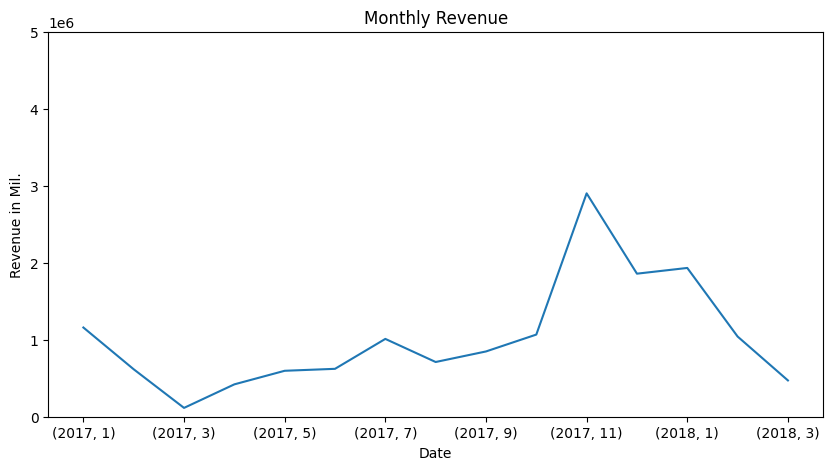

In [744]:
year_month_revenue.plot(figsize=(10,5), title="Monthly Revenue",ylabel="Revenue in Mil.",xlabel="Date", ylim=(0,5000000));

In [745]:
year_month_revenue2 = orderlines_ql.groupby([orderlines_ql["year"], orderlines_ql["month"]])["unit_price_total"].sum()

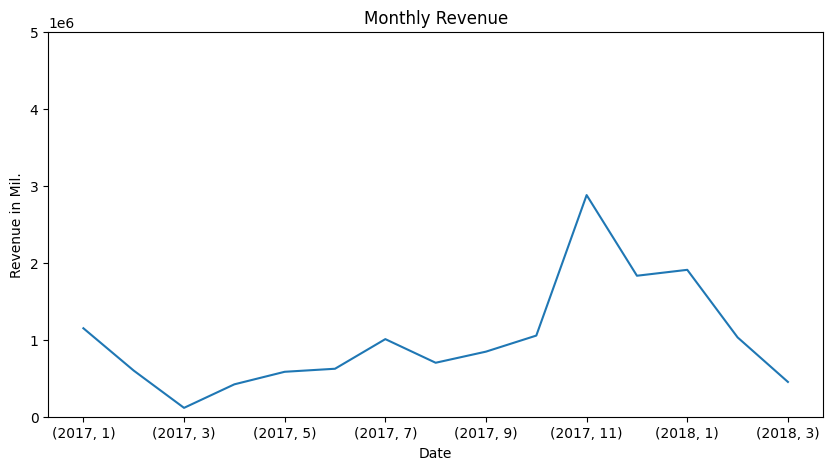

In [746]:
year_month_revenue2.plot(figsize=(10,5), title="Monthly Revenue",ylabel="Revenue in Mil.",xlabel="Date", ylim=(0,5000000));

In [747]:
year_month_discounts_percentage = orderlines_ql.groupby([orderlines_ql["year"], orderlines_ql["month"]])["discount"].mean()

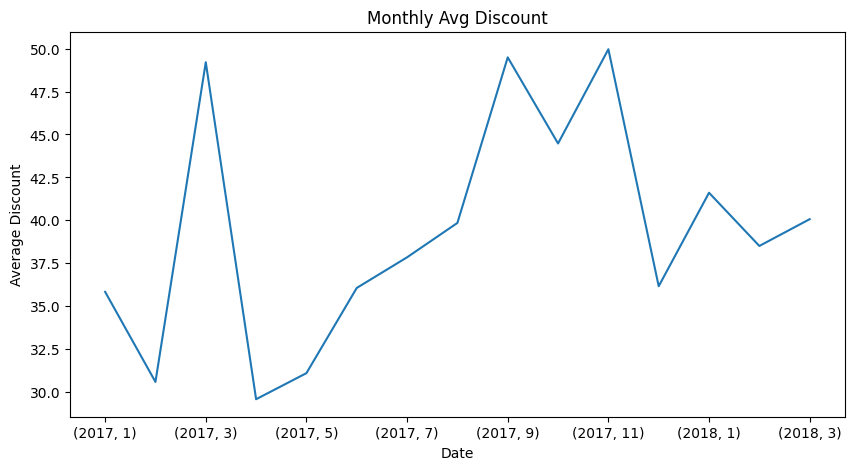

In [748]:
year_month_discounts_percentage.plot(figsize=(10,5), title="Monthly Avg Discount",ylabel="Average Discount",xlabel="Date");

In [749]:
year_month_discounts_percentage = orderlines_ql.groupby([orderlines_ql["year"], orderlines_ql["month"]])["Dis_Percentage"].mean()

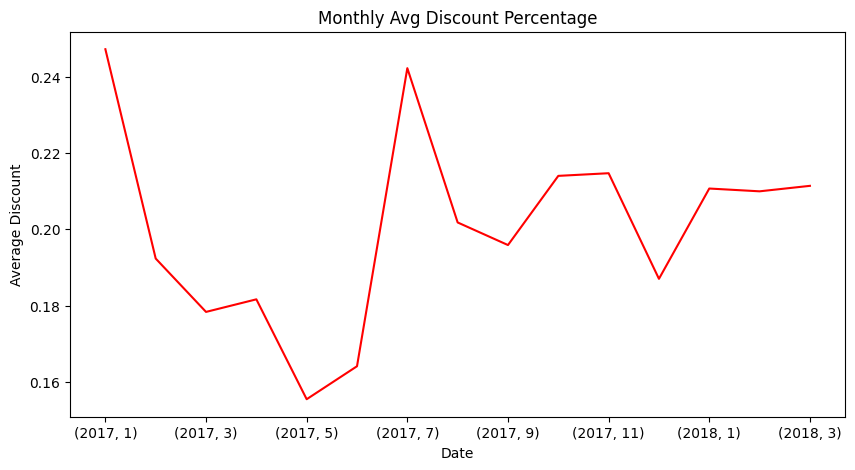

In [750]:
year_month_discounts_percentage.plot(figsize=(10,5), title="Monthly Avg Discount Percentage",ylabel="Average Discount",xlabel="Date", color="red");

In [751]:
Amount_sold_category = orderlines_ql.groupby("category")["sku"].count().sort_values(ascending=False)

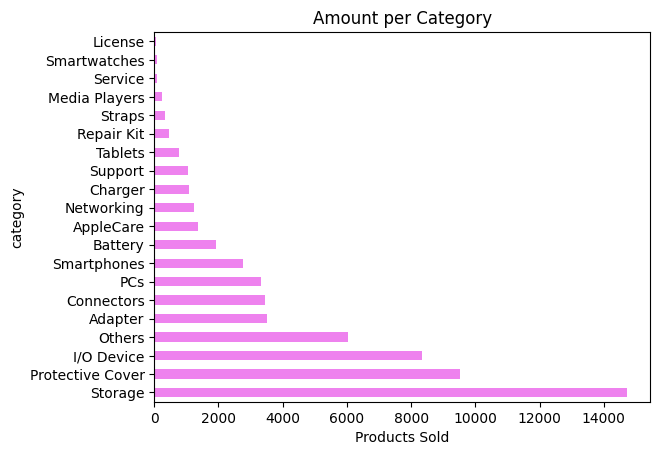

In [752]:
Amount_sold_category.plot.barh(title="Amount per Category", color="violet", xlabel= "Products Sold");

In [753]:
Sum_sold_category = orderlines_ql.groupby("category")["unit_price"].sum().sort_values(ascending=False)

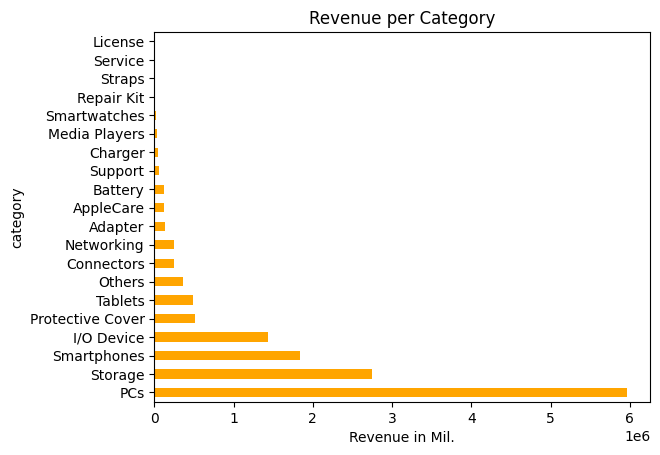

In [754]:
Sum_sold_category.plot.barh(title="Revenue per Category", color="orange", xlabel="Revenue in Mil.");

In [755]:
Discount_Percentage_category = orderlines_ql.groupby("category")["Dis_Percentage"].mean().sort_values(ascending=False)

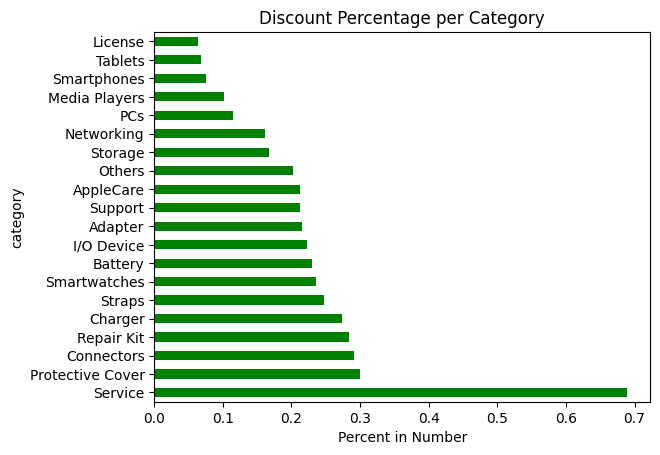

In [756]:
Discount_Percentage_category.plot.barh(color="green", title="Discount Percentage per Category", xlabel="Percent in Number");

In [789]:
order_ql["Season"] = ""
order_ql.loc[order_ql["month"] == 1, "Season"] = "Winter"
order_ql.loc[order_ql["month"].between(2, 5), "Season"] = "Spring"
order_ql.loc[order_ql["month"].between(6, 9), "Season"] = "Summer"
order_ql.loc[order_ql["month"].between(10, 12), "Season"] = "Winter"

In [790]:
order_ql.groupby("Season")["order_id"].count()

Season
Spring    10573
Summer     9268
Winter    25609
Name: order_id, dtype: int64

In [791]:
season_count = order_ql.groupby("Season")["order_id"].count()

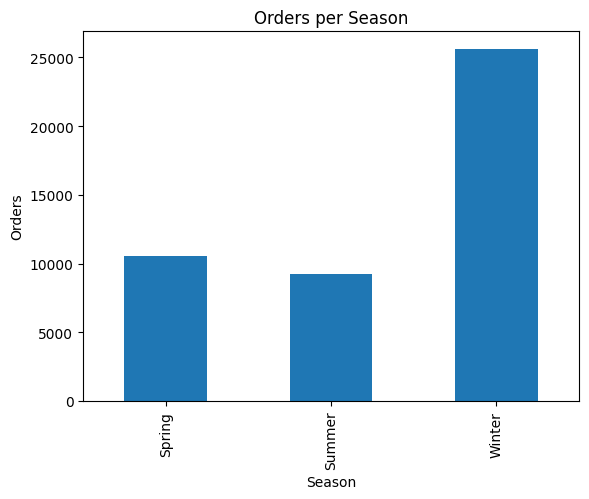

In [792]:
season_count.plot.bar(title="Orders per Season", ylabel="Orders");

In [793]:
season_revenue = order_ql.groupby("Season")["total_paid"].sum()

In [795]:
season_revenue

Season
Spring   3260676.98
Summer   3190910.61
Winter   8916309.63
Name: total_paid, dtype: float64

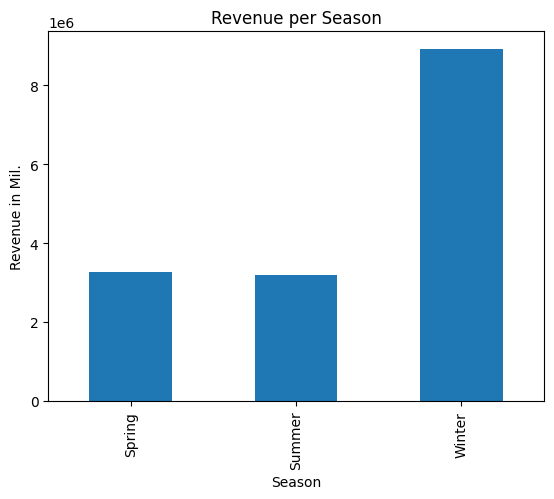

In [794]:
season_revenue.plot.bar(title="Revenue per Season", ylabel="Revenue in Mil.");